<a href="https://colab.research.google.com/github/devasworski/Deeper-Networks-for-Image-Classification/blob/main/VGG_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG16 for Image Classification using PyTorch

Using VGG16 on the MNIST and CIFAR datasets for image classification.
This is using the PyTorch library, which does not come with an implementation for continuous Checkpoints. 
For that reasons, this notebook currently does not save checkpoints. (This might be changed in a later revision)

## Download dependencies (Only for Google Colab)

In [ ]:
!git clone https://github.com/devasworski/Deeper-Networks-for-Image-Classification.git
!mv "/content/Deeper-Networks-for-Image-Classification/py/helper.py" "/content/"
!mv "/content/Deeper-Networks-for-Image-Classification/py/datasets.py" "/content/"
!mv "/content/Deeper-Networks-for-Image-Classification/py/VGG_torch.py" "/content/"
!mv "/content/Deeper-Networks-for-Image-Classification/py/helper_torch.py" "/content/"
!mv "/content/Deeper-Networks-for-Image-Classification/py/datasets_torch.py" "/content/"
!rm "/content/Deeper-Networks-for-Image-Classification/" -r

## Imports

In [1]:
try:
  from py import VGG_torch as VGG
  from py import helper as nnh
  from py import helper_torch as tnnh
except ImportError:
  import VGG_torch as VGG
  import helper as nnh
  import helper_torch as tnnh
from torchsummary import summary

## Hyperparameters

In [2]:
EPOCHS = 20
LEARNING_RATE = 0.01
DATASET = nnh.Dataset.CIFAR
RUNTIME = nnh.Runtime.colab
OPTIMIZER = nnh.Optimizer.SGD
MODELNAME = 'VGG-16'

## Load Dataset

In [3]:
train_loader, valid_loader, test_loader = tnnh.getDataset(DATASET)

## Load Model

In [ ]:
model = VGG.vgg16(10)
model = model.to(tnnh.getTorchDevice())
summary(model,(3, 64, 64))

## Train Model

In [6]:
tnnh.train(model=model, num_epochs=EPOCHS, train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader, optimizer=tnnh.getOptimizer(OPTIMIZER,model))

## Evaluate Model

In [ ]:
tnnh.printAccuracy(model,test_loader)

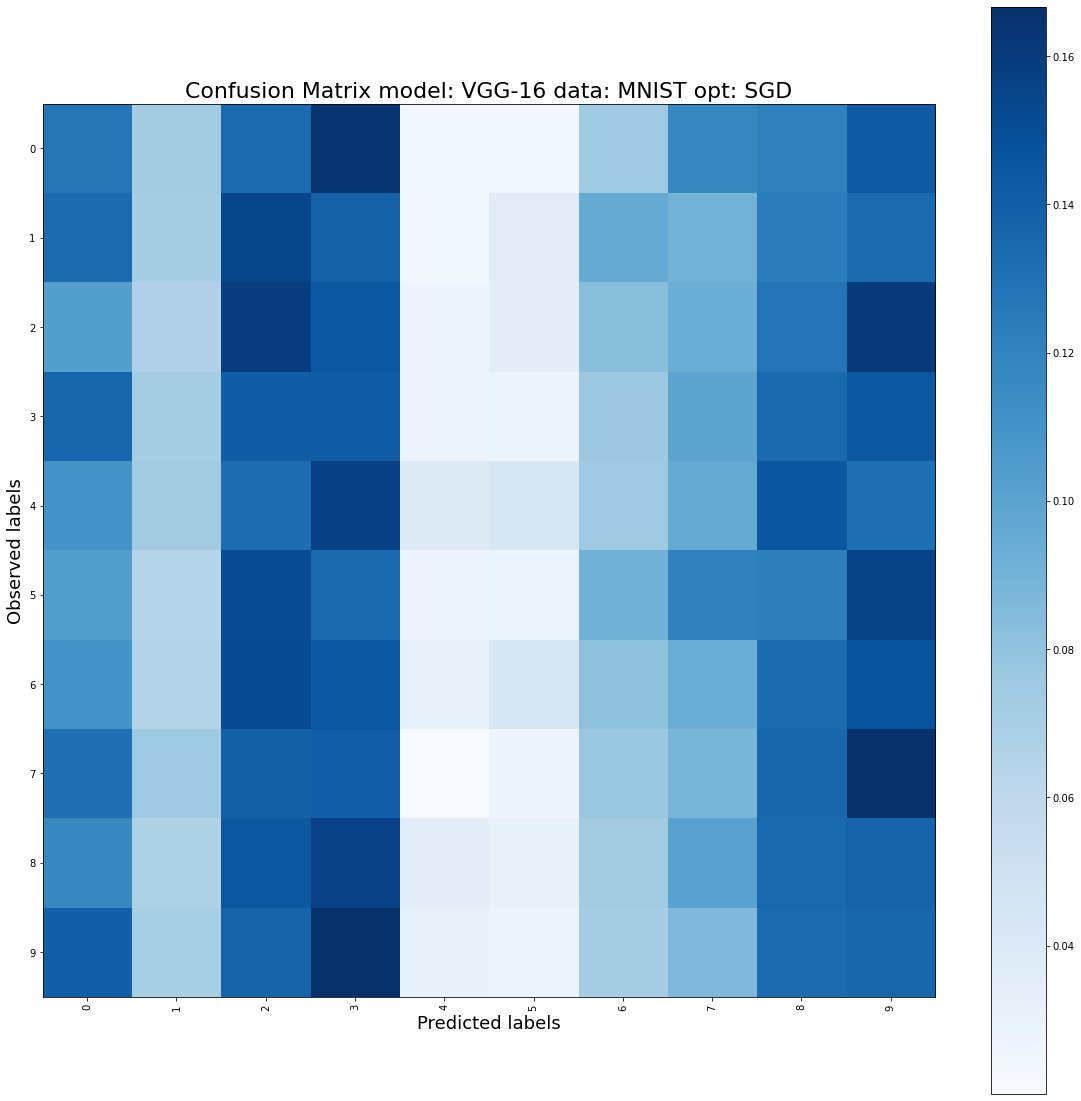

In [5]:
tnnh.plot_confusion_matrix(model,test_loader,DATASET,MODELNAME,OPTIMIZER)